## Random walker type

In [1]:
mutable struct SimpleWalker
    x::Int
end

In [2]:
SimpleWalker

SimpleWalker

In [3]:
methods(SimpleWalker)

# 2 methods for type constructor:
[1] SimpleWalker(x::Int64) in Main at In[1]:2
[2] SimpleWalker(x) in Main at In[1]:2

In [5]:
d = SimpleWalker(0)

SimpleWalker(0)

In [6]:
d

SimpleWalker(0)

In [7]:
typeof(d)

SimpleWalker

In [8]:
SimpleWalker()

MethodError: MethodError: no method matching SimpleWalker()
Closest candidates are:
  SimpleWalker(!Matched::Int64) at In[1]:2
  SimpleWalker(!Matched::Any) at In[1]:2

In [9]:
function SimpleWalker()
    return SimpleWalker(0)
end

SimpleWalker

In [10]:
SimpleWalker() = SimpleWalker(0)

SimpleWalker

In [11]:
methods(SimpleWalker)

# 3 methods for type constructor:
[1] SimpleWalker() in Main at In[10]:1
[2] SimpleWalker(x::Int64) in Main at In[1]:2
[3] SimpleWalker(x) in Main at In[1]:2

In [12]:
d

SimpleWalker(0)

In [13]:
d.x

0

In [14]:
d.x

0

In [15]:
d.x = 10

10

In [16]:
d

SimpleWalker(10)

## Functions

In [17]:
function pos(w::SimpleWalker)
    return w.x
end

pos (generic function with 1 method)

In [18]:
pos(w::SimpleWalker) = w.x

pos (generic function with 1 method)

In [19]:
function jump!(w::SimpleWalker)
    w.x += rand( (-1, +1) )
end

jump! (generic function with 1 method)

In [21]:
d

SimpleWalker(10)

In [22]:
pos(d)

10

In [23]:
jump!(d)

9

In [24]:
pos(d)

9

In [25]:
d.x

9

In [26]:
function jump!(w::SimpleWalker)
    w.x += rand( (-1, +1) )
    return w
end

jump! (generic function with 1 method)

In [27]:
jump!(d)

SimpleWalker(8)

In [28]:
function jump!(w::SimpleWalker)
    w.x += rand( (-1, +1) )
    return nothing
end

jump! (generic function with 1 method)

In [29]:
jump!(d)

In [30]:
typeof(nothing)

Nothing

In [31]:
jump!(w::SimpleWalker) = ( w.x += rand( (-1, +1) ); return w )

jump! (generic function with 1 method)

In [33]:
function walk!(w::SimpleWalker, N)
    positions = [pos(w)]

    for i in 1:N
        jump!(w)
        push!(positions, pos(w))
    end
    
    return positions
end

walk! (generic function with 1 method)

In [45]:
d = SimpleWalker()

SimpleWalker(0)

In [46]:
positions = walk!(d, 10)

11-element Array{Int64,1}:
  0
 -1
 -2
 -3
 -2
 -3
 -4
 -5
 -6
 -7
 -6

In [47]:
d

SimpleWalker(-6)

In [48]:
jump!(d)

SimpleWalker(-5)

In [49]:
[jump!(d) for i in 1:10]

10-element Array{SimpleWalker,1}:
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)
 SimpleWalker(1)

In [50]:
d

SimpleWalker(1)

In [51]:
d = SimpleWalker()



SimpleWalker(0)

In [53]:
[copy(jump!(d)) for i in 1:10]

MethodError: MethodError: no method matching copy(::SimpleWalker)
Closest candidates are:
  copy(!Matched::Expr) at expr.jl:36
  copy(!Matched::Core.CodeInfo) at expr.jl:64
  copy(!Matched::BitSet) at bitset.jl:46
  ...

In [54]:
[pos(jump!(d)) for i in 1:10]

10-element Array{Int64,1}:
  2
  1
  0
  1
  0
  1
  0
 -1
  0
  1

In [ ]:
function walk!(w::Union{SimpleWalker,ContinuousWalker}, N)
    positions = [pos(w)]

    for i in 1:N
        jump!(w)
        push!(positions, pos(w))
    end
    
    return positions
end

## Common supertype

In [55]:
abstract type Walker end

In [56]:
mutable struct DiscreteWalker <: Walker # is a subtype of
    x::Int
end

In [57]:
mutable struct ContinuousWalker <: Walker # is a subtype of
    x::Float64
end

In [58]:
pos(w::Walker) = w.x

pos (generic function with 2 methods)

In [59]:
d = DiscreteWalker(0)

DiscreteWalker(0)

In [60]:
c = ContinuousWalker(0.0)

ContinuousWalker(0.0)

In [61]:
typeof(d)

DiscreteWalker

In [62]:
d isa DiscreteWalker

true

In [63]:
d isa Walker

true

In [64]:
pos(d)

0

In [65]:
pos(c)

0.0

In [66]:
special_pos(w::Walker) = w.x

special_pos (generic function with 1 method)

In [71]:
special_pos(w::DiscreteWalker) = (Float64(w.x); @show "HELLO")

special_pos (generic function with 2 methods)

In [72]:
methods(special_pos)

# 2 methods for generic function "special_pos":
[1] special_pos(w::DiscreteWalker) in Main at In[71]:1
[2] special_pos(w::Walker) in Main at In[66]:1

In [73]:
special_pos(c)

0.0

In [74]:
special_pos(d)

"HELLO" = "HELLO"


"HELLO"

In [75]:
jump!(w::DiscreteWalker) = w.x += rand((-1, 1))
jump!(w::ContinuousWalker) = w.x += rand() - 0.5

jump! (generic function with 3 methods)

In [76]:
function walk!(w::Walker, N)
    positions = [pos(w)]

    for i in 1:N
        jump!(w)
        push!(positions, pos(w))
    end
    
    return positions
end

walk! (generic function with 2 methods)

In [78]:
walk!(d, 10)

11-element Array{Int64,1}:
  0
 -1
  0
  1
  2
  3
  2
  1
  0
  1
  2

In [79]:
walk!(c, 10)

11-element Array{Float64,1}:
  0.0                 
 -0.41078173814216856 
 -0.6063799439652793  
 -0.955582153878888   
 -1.1806413572337733  
 -1.0722692777841618  
 -0.6374999168322559  
 -0.15307871687643182 
 -0.21620172687057493 
  0.039103791355175055
  0.21964383559356526 

In [90]:
mutable struct NewWalker2 <: Walker
    y::Int
end

In [91]:
n = NewWalker2(0)

NewWalker2(0)

In [92]:
pos(n)

ErrorException: type NewWalker2 has no field x

In [93]:
pos(w::NewWalker2) = w.y

pos (generic function with 4 methods)

In [84]:
pos(n)

0

In [94]:
jump!(w::NewWalker2) = w.y += 1

jump! (generic function with 5 methods)

In [95]:
walk!(n, 10)

11-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10


## Monty Hall

In [96]:
my_choice = rand(1:3)

3

In [97]:
car = rand(1:3)

2

In [98]:
possible = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [100]:
?delete!

search: delete! deleteat!



```
delete!(collection, key)
```

Delete the mapping for the given key in a collection, and return the collection.

# Examples

```jldoctest
julia> d = Dict("a"=>1, "b"=>2)
Dict{String,Int64} with 2 entries:
  "b" => 2
  "a" => 1

julia> delete!(d, "b")
Dict{String,Int64} with 1 entry:
  "a" => 1
```


In [99]:
delete!(possible, my_choice)

MethodError: MethodError: no method matching delete!(::Array{Int64,1}, ::Int64)
Closest candidates are:
  delete!(!Matched::BitSet, ::Int64) at bitset.jl:297
  delete!(!Matched::IdDict{K,V} where V, ::Any) where K at abstractdict.jl:624
  delete!(!Matched::Base.IdSet, ::Any) at abstractdict.jl:693
  ...

## Pi area

In [101]:
rand_in_interval() = rand() * 2 - 1

rand_in_interval (generic function with 1 method)

In [102]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


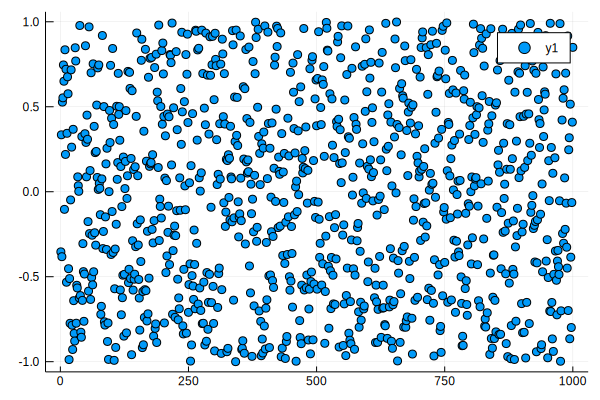

In [103]:
scatter([rand_in_interval() for i in 1:1000])

In [104]:
rand_in_square() = (rand_in_interval(), rand_in_interval())

rand_in_square (generic function with 1 method)

In [107]:
(x, y) = rand_in_square()   # tuple unpacking

(-0.6625689804362849, 0.9430614949763605)

In [108]:
x

-0.6625689804362849

In [110]:
y

0.9430614949763605

In [111]:
is_inside_unit_circle(x, y) = x^2 + y^2 ≤ 1

is_inside_unit_circle (generic function with 1 method)